In [15]:
# process ama announcement data
import json

data = json.load(open("PB-discord-data/pb-data/ama-notes.json"))

import csv

# convert json to csv
with open('./csv/ama.csv', 'w') as f:
    # headers: id, content, timestamp,  author.id, author.username, attachments url as a string list
    headers = ['id', 'content', 'timestamp', 'author_id', 'author_username', 'attachments', 'reaction_list', 'reaction_emoji_count_list']
    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()
    for item in data:
        writer.writerow({
            'id': item['id'],
            'content': item['content'],
            'timestamp': item['timestamp'],
            'author_id': item['author']['id'],
            'author_username': item['author']['username'],
            'attachments': ','.join([x['url'] for x in item['attachments']]),
            #if key 'reactions' does not exist, create a placeholder
            'reaction_list': ','.join([x['emoji']['name'] for x in item['reactions']]) if 'reactions' in item else '',
            'reaction_emoji_count_list': ','.join([str(x['count']) for x in item['reactions']]) if 'reactions' in item else ''
        })






In [16]:


# process community announcement data
import json

data = json.load(open("PB-discord-data/pb-data/community-announcements.json"))

import csv

# convert json to csv
with open('./csv/community.csv', 'w') as f:
    # headers: id, content, timestamp,  author.id, author.username, attachments url as a string list
    headers = ['id', 'content', 'timestamp', 'author_id', 'author_username', 'attachments','reaction_list', 'reaction_emoji_count_list']
    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()
    for item in data:
        writer.writerow({
            'id': item['id'],
            'content': item['content'],
            'timestamp': item['timestamp'],
            'author_id': item['author']['id'],
            'author_username': item['author']['username'],
            'attachments': ','.join([x['url'] for x in item['attachments']]),
            'reaction_list': ','.join([x['emoji']['name'] for x in item['reactions']]) if 'reactions' in item else '',
            'reaction_emoji_count_list': ','.join([str(x['count']) for x in item['reactions']]) if 'reactions' in item else ''
        })






In [17]:
# process official announcement data
import json

data = json.load(open("PB-discord-data/pb-data/official-announcements.json"))

import csv

# convert json to csv
with open('./csv/official.csv', 'w') as f:
    # headers: id, content, timestamp,  author.id, author.username, attachments url as a string list
    headers = ['id', 'content', 'timestamp', 'author_id', 'author_username', 'attachments','reaction_list', 'reaction_emoji_count_list']
    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()
    for item in data:
        writer.writerow({
            'id': item['id'],
            'content': item['content'],
            'timestamp': item['timestamp'],
            'author_id': item['author']['id'],
            'author_username': item['author']['username'],
            'attachments': ','.join([x['url'] for x in item['attachments']]),
            'reaction_list': ','.join([x['emoji']['name'] for x in item['reactions']]) if 'reactions' in item else '',
            'reaction_emoji_count_list': ','.join([str(x['count']) for x in item['reactions']]) if 'reactions' in item else ''
        })






In [19]:
# process phbc announcement data
import json

data = json.load(open("PB-discord-data/pb-data/holders-announcements.json"))

import csv

# convert json to csv
with open('./csv/phbc.csv', 'w') as f:
    # headers: id, content, timestamp,  author.id, author.username, attachments url as a string list
    headers = ['id', 'content', 'timestamp', 'author_id', 'author_username', 'attachments', 'reaction_list', 'reaction_emoji_count_list']
    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()
    for item in data:
        writer.writerow({
            'id': item['id'],
            'content': item['content'],
            'timestamp': item['timestamp'],
            'author_id': item['author']['id'],
            'author_username': item['author']['username'],
            'attachments': ','.join([x['url'] for x in item['attachments']]),
            'reaction_list': ','.join([x['emoji']['name'] for x in item['reactions']]) if 'reactions' in item else '',
            'reaction_emoji_count_list': ','.join([str(x['count']) for x in item['reactions']]) if 'reactions' in item else ''
        })






In [163]:
# process socials announcement data
import json

data = json.load(open("./json/socials.json"))

import csv

# convert json to csv
with open("./csv/socials.csv", "w") as f:
    # headers: id, content, timestamp,  author.id, author.username, attachments url as a string list
    headers = [
        "id",
        "content",
        "timestamp",
        "author_id",
        "author_username",
        "attachments",
        "embed_1_url",
        "embed_1_desc",
        "embed_1_images",
        "embed_2_url",
        "embed_2_desc",
        "embed_2_images",
    ]

    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()

    embed_1_url = ""
    embed_1_desc = ""
    embed_1_images = ""
    embed_2_url = ""
    embed_2_desc = ""
    embed_2_images = ""

    for item in data:
        # group embeds based on url
        embeds = {}
        for embed in item["embeds"]:
            # if url field does not exist
            if "url" not in embed:
                # create url as empty string
                embed["url"] = ""
            if embed["url"] not in embeds:
                embeds[embed["url"]] = []
            # create image field if it does not exist
            if "image" not in embed:
                embed["image"] = {}
                embed["image"]["url"] = ""
            embeds[embed["url"]].append(embed)
        # print(embeds)
        key_list = list(embeds.keys())
        print(len(key_list))
        # iterate through key_list
        for i in range(len(key_list)):
            key_name = key_list[i]
            # if i == 0
            if i == 0:
                embed_1_url = key_name
                embed_1_desc = embeds[key_name][0]["description"]
                embed_1_images = ",".join([x["image"]["url"] for x in embeds[key_name]])

            if i == 1:
                embed_2_url = key_name
                embed_2_desc = embeds[key_name][0]["description"]
                embed_2_images = ",".join([x["image"]["url"] for x in embeds[key_name]])

        writer.writerow(
            {
                "id": item["id"],
                "content": item["content"],
                "timestamp": item["timestamp"],
                "author_id": item["author"]["id"],
                "author_username": item["author"]["username"],
                "attachments": ",".join([x["url"] for x in item["attachments"]]),
                "embed_1_url": embed_1_url,
                "embed_1_desc": embed_1_desc,
                "embed_1_images": embed_1_images,
                "embed_2_url": embed_2_url,
                "embed_2_desc": embed_2_desc,
                "embed_2_images": embed_2_images,
            }
        )

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
2
1
2
2
1
1
1
1
1
2
2
2
1
1
2
2
2
2
2
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
# import community.csv
community = pd.read_csv("./csv-version2/community.csv")
official = pd.read_csv("./csv-version2/official.csv")

# combine community and official df
df = pd.concat([community, official])

In [13]:
def convert_to_datetime(timestamp_str):
    datetime_obj = datetime.fromisoformat(timestamp_str)
    return datetime_obj.strftime('%Y-%m-%d %H:%M:%S')

In [18]:
# convert timestamp to datetime
df['timestamp'] = df['timestamp'].apply(convert_to_datetime)
def extract_year_month(datetime_str):
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    return f"{datetime_obj.year}-{datetime_obj.month:02}"

# Apply the function to create a new 'year_month' column
df['year_month'] = df['timestamp'].apply(extract_year_month)

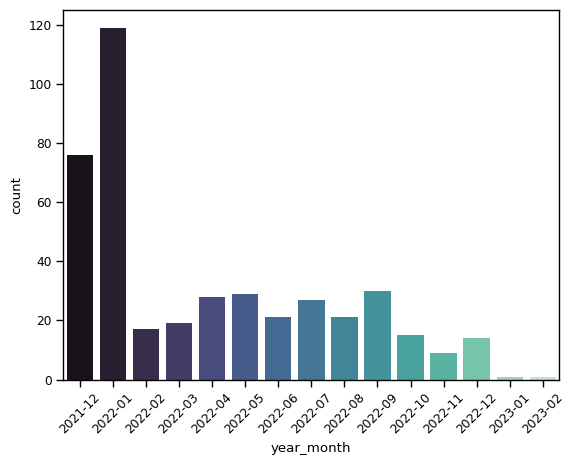

In [30]:
sns.set_context('paper')
sns.countplot(x = 'year_month', data = df.sort_values(by=['year_month']), palette='mako')
plt.xticks(rotation=45)
plt.show()

/var/folders/6l/__m_t5fn1zqgbdwzg0by22400000gn/T/ipykernel_53149/558911162.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='Spectral_r'), orientation='vertical')


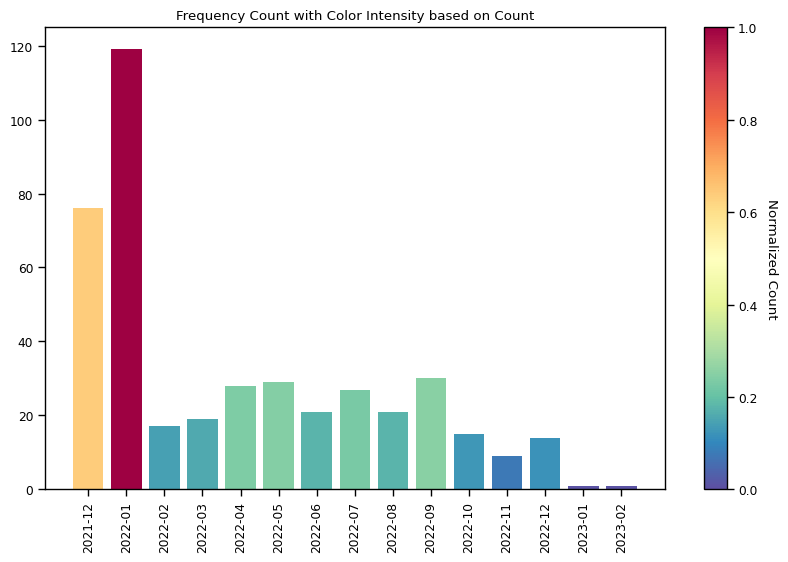

In [42]:
sorted_counts = df['year_month'].value_counts().sort_index()

# Normalize the counts to lie between 0 and 1
normalized_counts = sorted_counts / sorted_counts.max()

# Choose a colormap and map the normalized counts to colors
colors = plt.cm.Spectral_r(normalized_counts)

# Create the bar plot with colors based on counts
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_counts.index, sorted_counts.values, color=colors)

# Rotate the x-axis labels and set title
plt.xticks(rotation=90)
plt.title("Frequency Count with Color Intensity based on Count")

# Add a colorbar to show the mapping between counts and colors
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='Spectral_r'), orientation='vertical')
cbar.set_label('Normalized Count', rotation=270, labelpad=15)

plt.show()